In [ ]:
# Installing OCR
!pip install opencv-python
!pip install easyocr
!pip uninstall opencv-python-headless
!pip install opencv-python-headless==4.1.2.30

# Installing spacy and downloading their pretrained model
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download  en_core_web_md

# Installing for face detection
!pip install cvlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 27 kB/s 
     |████████████████████████████████| 47.6 MB 83 kB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66
Found existing installation: opencv-python-headless 4.5.4.60
Uninstalling opencv-python-headless-4.5.4.60:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.4.60.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-64ac49e1.so.58.91.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-4b79e479.so.58.45

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-08-08 11:37:18.065671: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 3.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 57.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046369 sha256=167f6e716363e64b62bea5008ce984b96e3f4230e82082155c19fca5972f0cf6
  Stored in directory: /root/.cache/pip/wheels

In [ ]:
import cv2
import numpy as np
import easyocr
import spacy
import json
import cvlib as cv
import re

from spacy.tokens import DocBin
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

nlp = spacy.load("en_core_web_md")

In [ ]:
im_1_path = '/content/drive/MyDrive/MTP/SampleImages/1.png'
im_2_path = '/content/drive/MyDrive/MTP/SampleImages/2.png'
im_3_path = '/content/drive/MyDrive/MTP/SampleImages/3.gif'
im_4_path = '/content/drive/MyDrive/MTP/SampleImages/4.png'
im_5_path = '/content/drive/MyDrive/MTP/SampleImages/5.jpg'
im_6_path = '/content/drive/MyDrive/MTP/SampleImages/6.jpg'
im_8_path = '/content/drive/MyDrive/MTP/SampleImages/8.jpg'
im_9_path = '/content/drive/MyDrive/MTP/SampleImages/9.jpg'
im_10_path = '/content/drive/MyDrive/MTP/SampleImages/10.jpg'
im_11_path = '/content/drive/MyDrive/MTP/SampleImages/11.png'
im_id_card_path = '/content/drive/MyDrive/MTP/SampleImages/IDCard-1.jpeg'

sharpened_image_path = '/content/drive/MyDrive/MTP/SampleImages/temp.png'

In [ ]:
id_card_image_1 = '/content/drive/MyDrive/MTP/IDCards/1.jpeg'
id_card_image_2 = '/content/drive/MyDrive/MTP/IDCards/2.jpeg'
id_card_image_3 = '/content/drive/MyDrive/MTP/IDCards/3.jpeg'
id_card_image_4 = '/content/drive/MyDrive/MTP/IDCards/4.jpeg'
id_card_image_5 = '/content/drive/MyDrive/MTP/IDCards/5.jpeg'
id_card_image_6 = '/content/drive/MyDrive/MTP/IDCards/6.jpeg'

id_card_image_test = '/content/drive/MyDrive/MTP/IDCards/test.png'
id_card_image_test_2 = '/content/drive/MyDrive/MTP/IDCards/test_2.jpg'

In [ ]:
f = open('/content/drive/MyDrive/MTP/annotations_text.json')
TRAIN_DATA = json.load(f)

with open('/content/drive/MyDrive/MTP/annotations_text.json') as fp:
  training_data = json.load(fp)

db = DocBin()

for text, annot in tqdm(TRAIN_DATA['annotations']): 
  doc = nlp.make_doc(text) 
  ents = []
  for start, end, label in annot["entities"]:
      span = doc.char_span(start, end, label=label, alignment_mode="contract")
      if span is None:
          print("Skipping entity")
      else:
          ents.append(span)
  doc.ents = ents 
  db.add(doc)

db.to_disk("./training_data.spacy") # save the docbin object

100%|██████████| 84/84 [00:00<00:00, 2499.59it/s]

Skipping entity


In [ ]:
!python -m spacy init config config.cfg --lang en --pipeline ner --optimize efficiency -F

2022-08-08 11:39:01.471513: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ To generate a more effective transformer-based config (GPU-only),
install the spacy-transformers package and re-run this command. The config
generated now does not use transformers.
ℹ Generated config template specific for your use case
- Language: en
- Pipeline: ner
- Optimize for: efficiency
- Hardware: CPU
- Transformer: None
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:
!python -m spacy train config.cfg --output ./ --paths.train ./training_data.spacy --paths.dev ./training_data.spacy

2022-08-08 11:39:13.687193: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
ℹ Saving to output directory: .
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2022-08-08 11:39:15,451] [INFO] Set up nlp object from config
[2022-08-08 11:39:15,477] [INFO] Pipeline: ['tok2vec', 'ner']
[2022-08-08 11:39:15,492] [INFO] Created vocabulary
[2022-08-08 11:39:15,503] [INFO] Finished initializing nlp object
[2022-08-08 11:39:16,066] [INFO] Initialized pipeline components: ['tok2vec', 'ner']
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     94.00   68.26   67.06   69.51    0.68
100     200          4

In [ ]:
nlp_custom = spacy.load("/content/model-best")

In [ ]:
doc = nlp_custom('''Table''') # input sample text
for word in doc.ents:
    print(word.text,word.label_)

Table NAME


In [ ]:
def get_text_using_easy_ocr(img_path):
  return easyocr.Reader(['en']).readtext(image = img_path, width_ths = 0, height_ths = 0, slope_ths = 0, ycenter_ths = 0)

In [ ]:
def contains_letter_and_number(text):
    return text.isalnum() and not text.isalpha() and not text.isdigit()

In [ ]:
def clean_text_partially(text):

  for r in (("_", ""), (" ", "")):
    text = text.replace(*r)
  
  return text

In [ ]:
def filter_personal_info(text):
  text = clean_text_partially(text)
  pretrained_ner_value, custom_ner_value = False, False

  for token in nlp(text):
    if token.pos_ == 'PROPN' or token.pos_ == 'NUM' or token.ent_type_ == 'GPE':
      pretrained_ner_value = True
  
  for word in nlp_custom(text).ents:
    if (word.label_ == 'NAME' and token.pos_ == 'NOUN'):
      custom_ner_value = True

  return pretrained_ner_value or custom_ner_value or contains_letter_and_number(text)

In [ ]:
def get_kernel():
  return np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

In [ ]:
def sharpen_image(img_path):
  image = cv2.imread(img_path, flags=cv2.IMREAD_COLOR)
  kernel = get_kernel()
  image_sharp = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
  cv2.imwrite(sharpened_image_path, image_sharp)

  return sharpened_image_path

In [ ]:
def redact_image_text(image, bbox):
  (top_left_row, top_left_column), (bottom_right_row, bottom_right_column) = bbox[0], bbox[2] 
  return cv2.rectangle(image, (int(top_left_row), int(top_left_column)), (int(bottom_right_row), int(bottom_right_column)), (0, 0, 0), -1)

In [ ]:
def image_bgr_to_rgb(img_path):
  img = cv2.imread(img_path)
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
def redact_image_face(image):
  faces, confidence = cv.detect_face(image)

  for face in faces:
    top_left_row, top_left_column, bottom_right_row, bottom_right_column = face[0], face[1], face[2], face[3]
    image = cv2.rectangle(image, (int(top_left_row), int(top_left_column)), (int(bottom_right_row), int(bottom_right_column)), (0, 0, 0), -1)

  return image

In [ ]:
def overlay_ocr_text(img_path):
    
    img = image_bgr_to_rgb(img_path)
    dpi = 10

    row, col, _ = img.shape
    fig_width, fig_height = int(row/dpi), int(col/dpi)
    plt.figure()
    _ , axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)

    for (bbox, text, prob) in get_text_using_easy_ocr(img_path):
        if prob >= 0.4:
          print(f'Identified text: {text} with the Probability of {prob:.2f}')

          if(filter_personal_info(text)):
              redact_image_text(img, bbox)
    
    redact_image_face(img)
    axarr[1].imshow(img)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteIdentified text: Jodhpur with the Probability of 0.97
Identified text: Technology with the Probability of 0.99
Identified text: of with the Probability of 0.94
Identified text: Institute with the Probability of 0.74
Identified text: Indian with the Probability of 0.86
Identified text: 47 with the Probability of 0.71
Identified text: Lahiri with the Probability of 1.00
Identified text: Prosad with the Probability of 1.00
Identified text: Niladri with the Probability of 0.89
Identified text: MTech. with the Probability of 0.49
Identified text: MT 9AIE272 with the Probability of 0.61
Identified text: Number: with the Probability of 1.00
Identified text: Roll with the Probability of 1.00
Identified text: of with the Probability of 1.00
Identified text: Birth: with the Probability of 0.99
Identified text: 13-08-994 with the Probability of 0.68
Identified text: Date with the Probability of 0.81
Identified text: Eng

<Figure size 432x288 with 0 Axes>

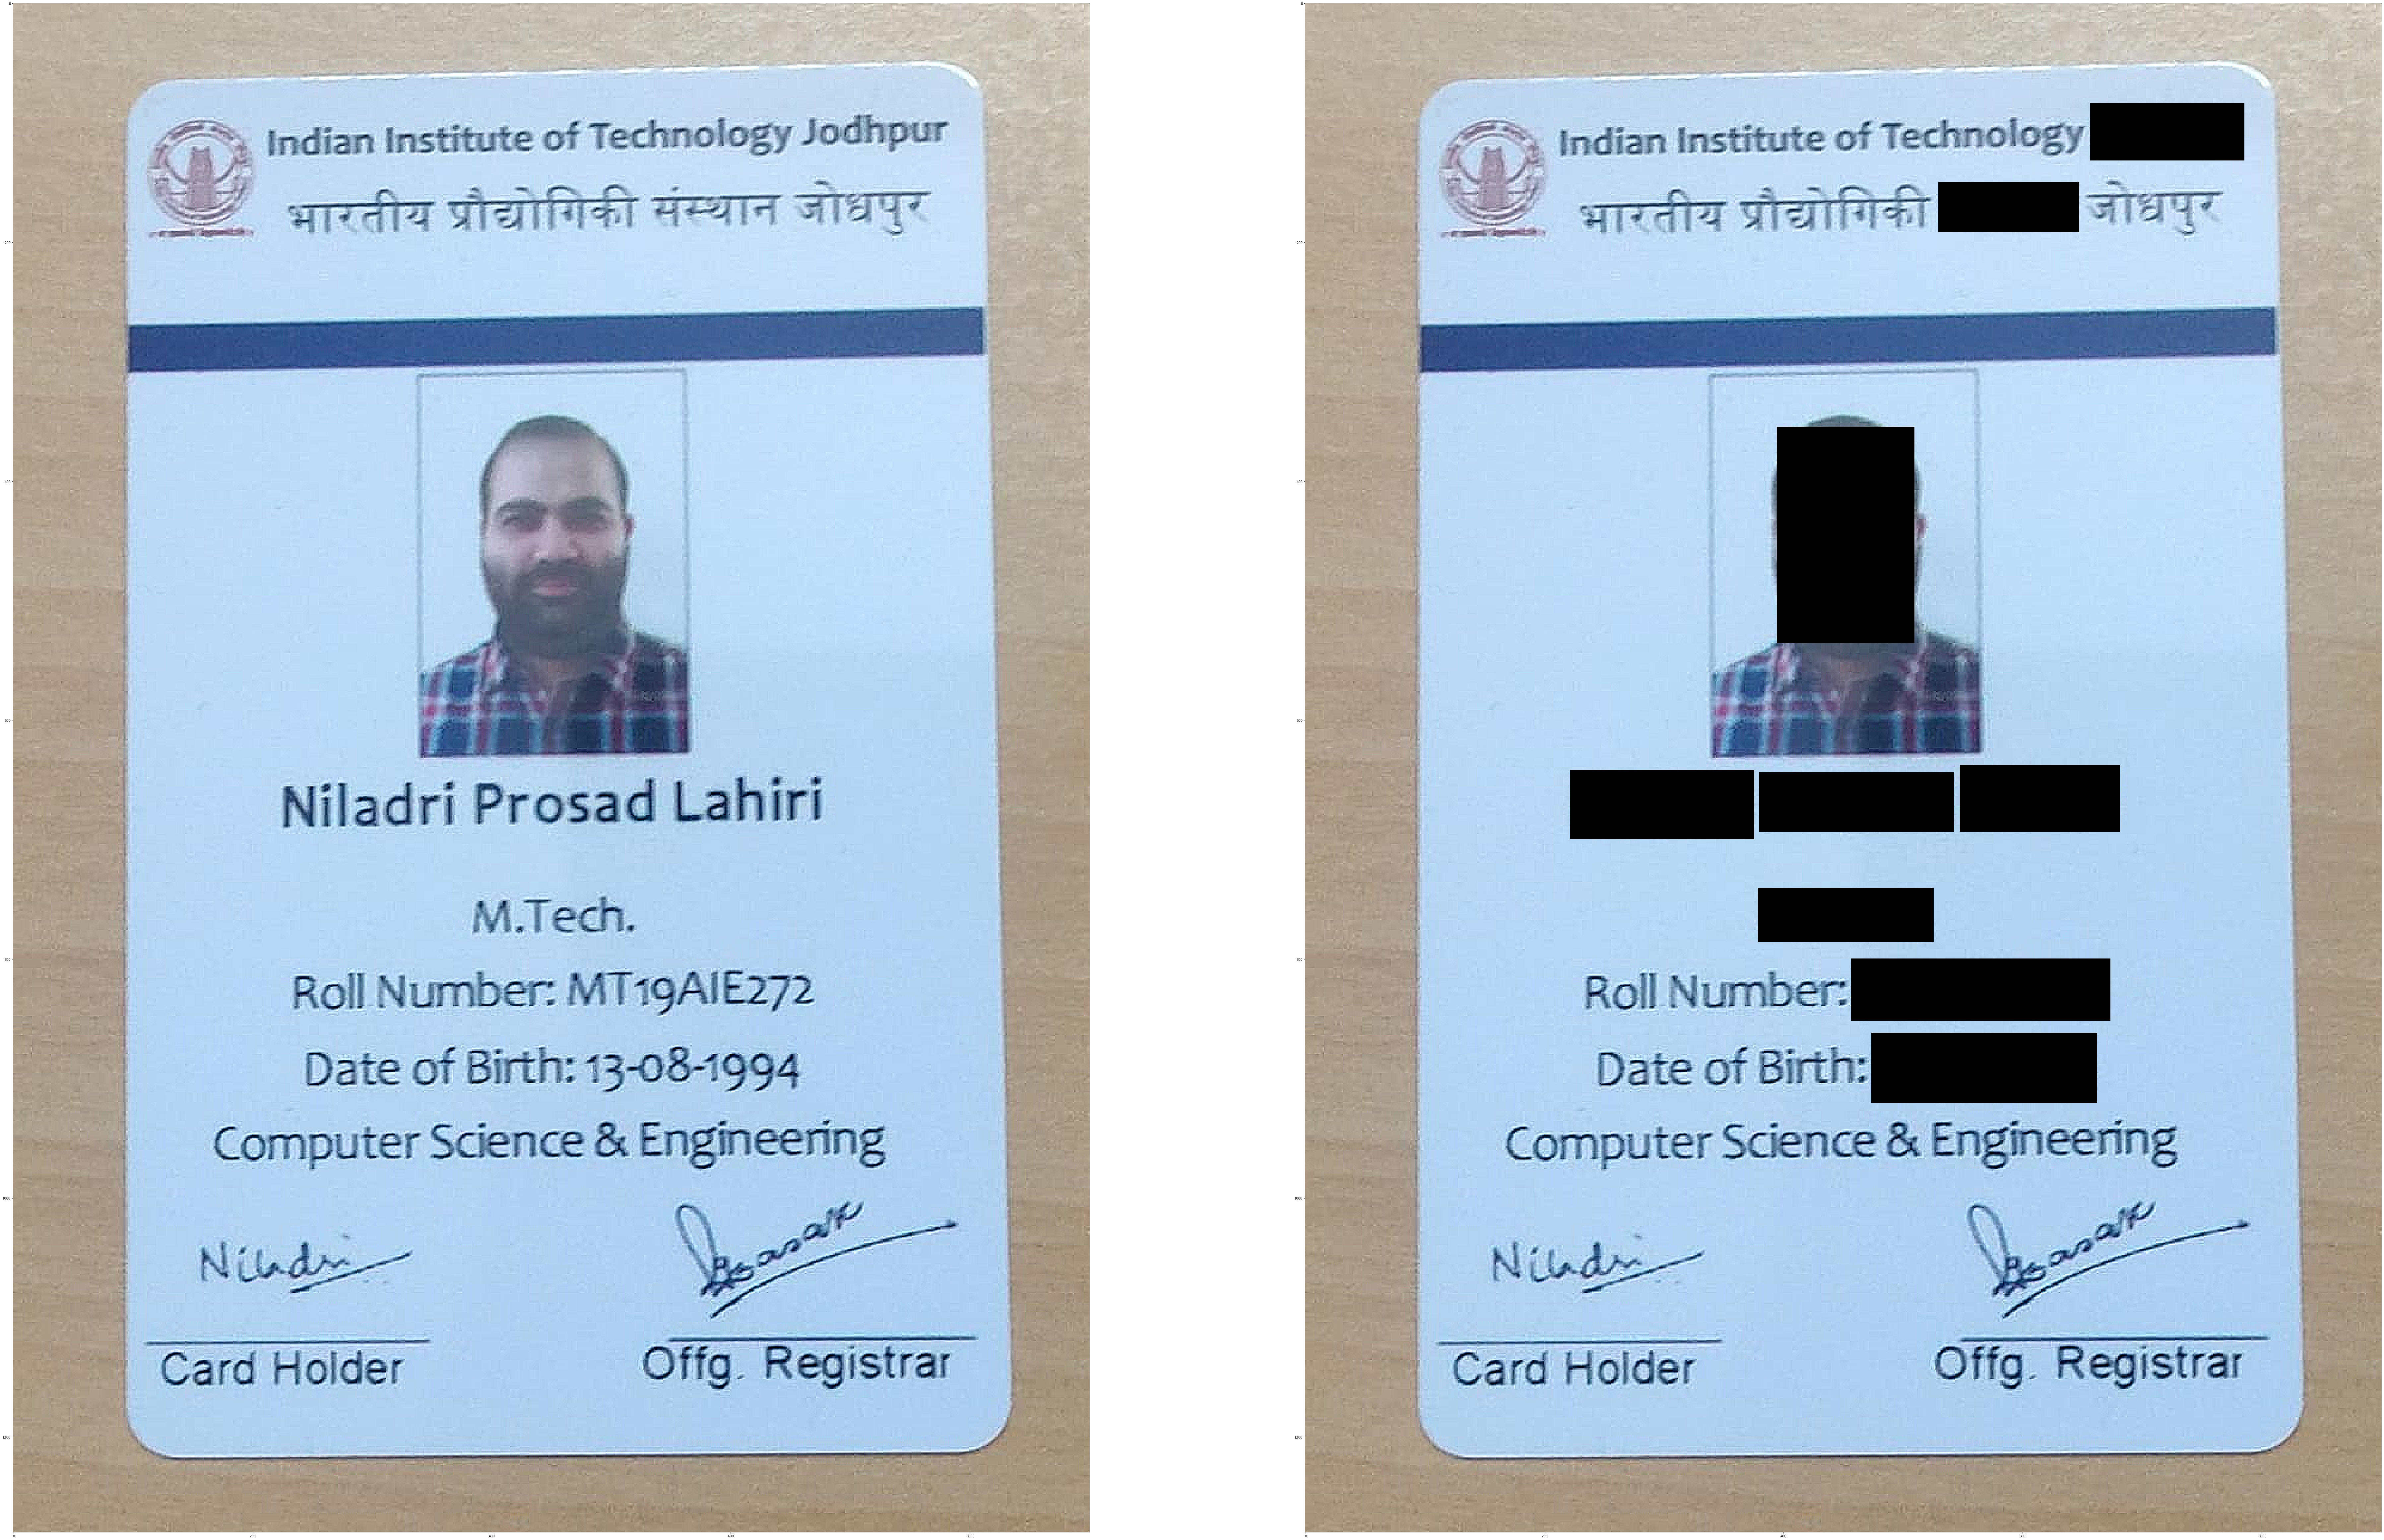

In [ ]:
overlay_ocr_text(sharpen_image(id_card_image_1))